# Importando librera y DF

In [10]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [ ]:
#NOTAS DE PRUEBA

In [11]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [12]:
df=pd.read_excel('col.xlsx')

In [13]:
df.groupby(["año"])["Resumen"].count()

año
2000    101
2001    131
2002     71
2003    105
2004     56
2005     68
2006     68
2007     82
2008     87
2009    123
2010    148
2011    134
2012    106
2013    112
2014    136
2015    165
2016    155
2017     79
2018     72
2019    113
2020     50
Name: Resumen, dtype: int64

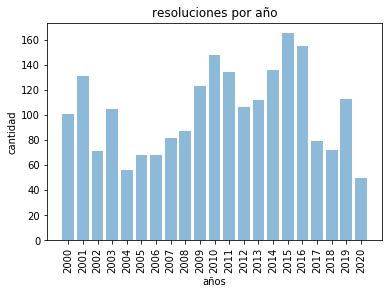

In [14]:
#Resoluciones por año
resoaño=df.groupby(["año"])["Resumen"].count()

plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [15]:
df=pd.read_excel('col.xlsx')
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
num_topics=6

#año
año=2020

#nombre
nombre="col200000.html"

In [16]:
df=df[df["año"]==año]

In [17]:
df

,reso,Resumen,año
0,CREG108-2020,energía eléctrica - se amplían los plazos de l...,2020
1,CREG107-2020,energía eléctrica - ampliación plazo para apli...,2020
2,CREG104-2020,energía eléctrica - se modifica parcialmente y...,2020
3,CREG100-2020,energía eléctrica - se modifica y adiciona la ...,2020
4,CREG099-2020,energía eléctrica - subasta de reconfiguración...,2020
5,CREG083-2020,energía eléctrica - reglas sobre el registro d...,2020
6,CREG082-2020,energía eléctrica - medidas transitorias al an...,2020
7,CREG081-2020,energía eléctrica - subasta de reconfiguración...,2020
8,CREG080-2020,energía eléctrica - medidas para asegurar el a...,2020
9,CREG072-2020,energía eléctrica - ingresos para interconexió...,2020


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [18]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")

In [19]:
df

,reso,Resumen,año
0,CREG108-2020,energía eléctrica - se amplían los plazos de l...,2020
1,CREG107-2020,energía eléctrica - ampliación plazo para apli...,2020
2,CREG104-2020,energía eléctrica - se modifica parcialmente y...,2020
3,CREG100-2020,energía eléctrica - se modifica y adiciona la ...,2020
4,CREG099-2020,energía eléctrica - subasta de reconfiguración...,2020
5,CREG083-2020,energía eléctrica - reglas sobre el registro d...,2020
6,CREG082-2020,energía eléctrica - medidas transitorias al an...,2020
7,CREG081-2020,energía eléctrica - subasta de reconfiguración...,2020
8,CREG080-2020,energía eléctrica - medidas para asegurar el a...,2020
9,CREG072-2020,energía eléctrica - ingresos para interconexió...,2020


In [20]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [21]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [22]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,abanderamiento,abanderamiento exclusivo,acuerdo,adelantar,adelantar auditorías,adelantar auditorías cargo,adiciona,adopta,adoptan,adoptan medidas,...,términos,términos ajuste,términos ajuste garantías,upme,verificaciones,verificaciones sistemas,verificaciones sistemas medida,visitas,visitas verificaciones,visitas verificaciones sistemas
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

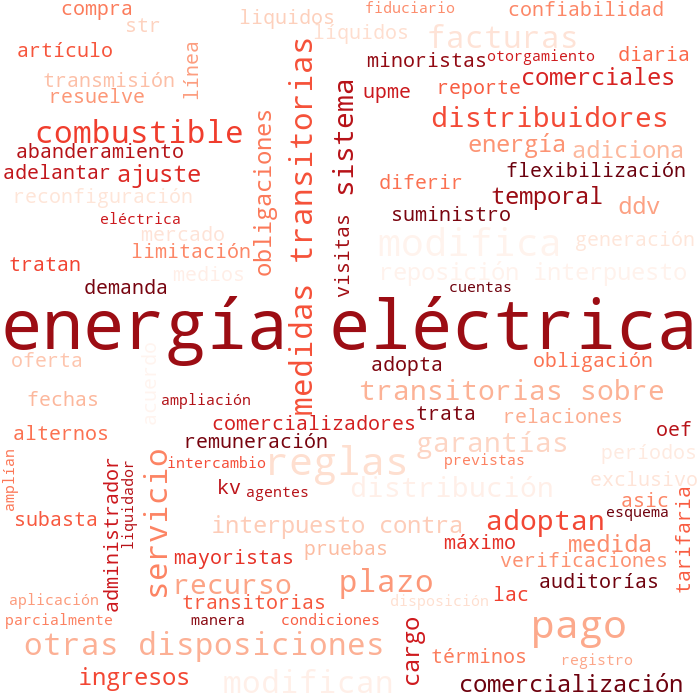

In [25]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [26]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [27]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
distribución, ingresos, eléctrica ingresos, energía eléctrica ingresos, comercialización, eléctrica modifican, energía eléctrica modifican, energía eléctrica distribución, distribución energía eléctrica, distribución energía, eléctrica distribución, kv, acuerdo, upme, transmisión

Topic #1:
energía eléctrica reglas, eléctrica reglas, reglas, eléctrica reglas transitorias, transitorias, reglas transitorias, transitorias visitas, visitas verificaciones, medida, medida tratan, reglas transitorias visitas, sistemas, sistemas medida, sistemas medida tratan, visitas verificaciones sistemas

Topic #2:
modifica, medidas, transitorias, pago, medidas transitorias, pago facturas, facturas, servicio energía eléctrica, servicio energía, servicio, pago facturas servicio, transitorias pago, transitorias pago facturas, medidas transitorias pago, facturas servicio energía

Topic #3:
disposiciones, modifican, compra oef, reconfiguración compra oef, subasta, eléctrica subasta, eléctrica subast

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [28]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 2.52 s


Text(0, 0.5, 'log-likelihood')

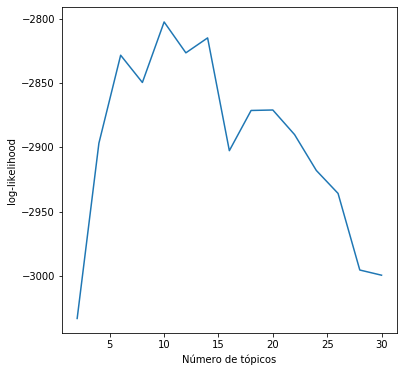

In [29]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA

In [30]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [31]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook